In [1]:
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
cd ~/CRG/scripts

/home/etiavlovsky/CRG/scripts


In [21]:
%run dataset_processing.py
features = load_feature_names("Features.txt")

In [10]:
%run dataset_processing.py
create_full_dataset("../Jurkat_hiv_50kb.txt")


Importing features from files
	Importing feature: row_sum
	Importing feature: gmfpt
	Importing feature: c_decay

Spliting into train and test and saving the datasets


In [4]:
%run dataset_processing.py
ML_inputs = get_ML_inputs(cat = "train")



Encoding categorical features

	There are (5,) unique values for "cat" feature.
	['AG' 'AP' 'EN' 'IN' 'SG']

	There are (2,) unique values for "strand" feature.
	['+' '-']


Identifying present feature types in the dataset

	58 features of type 'chip_c_hb' are present
		Excluding feature type: 'chip_c_hb'

	69 features of type 'distance' are present

	58 features of type 'chip_c_zb_r' are present

	58 features of type 'chip_c_hb_r' are present

	58 features of type 'chip_c_zb' are present
		Excluding feature type: 'chip_c_zb'

	7 features of type 'one_hot' are present

	1 features of type 'row_sum' are present

	1 features of type 'gmfpt' are present


Excluding columns:
['DNA', 'mapq', 'pos', 'chrom', 'targets', 'expr', 'RNA', 'pos_expr', 'brcd', 'nread', 'rep', 'gene_name']


Preprocessing feature type values

	Preprocessing 'distance' features
	Substituting NaNs with the values 10 times larger than max value found in the dataset
	Max value in the data 23552400.0
	Applying log1p to

In [5]:
ML_inputs["feature_types"]

{'chip_c_hb': array([ 83,  87,  91,  95,  99, 103, 107, 111, 115, 119, 123, 127, 131,
        135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183,
        187, 191, 195, 199, 203, 207, 211, 215, 219, 223, 227, 231, 235,
        239, 243, 247, 251, 255, 259, 263, 267, 271, 275, 279, 283, 287,
        291, 295, 299, 303, 307, 311]),
 'chip_c_hb_r': array([ 84,  88,  92,  96, 100, 104, 108, 112, 116, 120, 124, 128, 132,
        136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184,
        188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236,
        240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288,
        292, 296, 300, 304, 308, 312]),
 'chip_c_zb': array([ 81,  85,  89,  93,  97, 101, 105, 109, 113, 117, 121, 125, 129,
        133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181,
        185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233,
        237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285,
   

In [11]:
feature = "r"
array = ML_inputs["samples"][:,ML_inputs["feature_types"][feature]].ravel().astype(float)

(<matplotlib.figure.Figure at 0x7f1fdf5ad3d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1fde3eb190>)

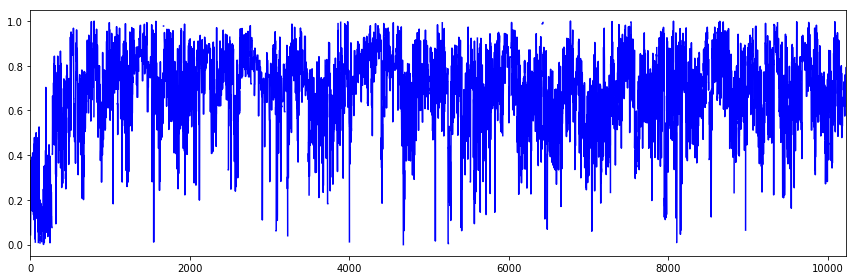

In [12]:
%run myplot
myplot(array)

(<matplotlib.figure.Figure at 0x7fc4ae89b5d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc4ae5cd9d0>)

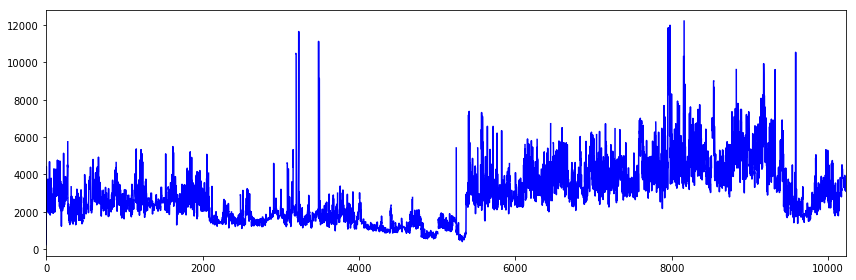

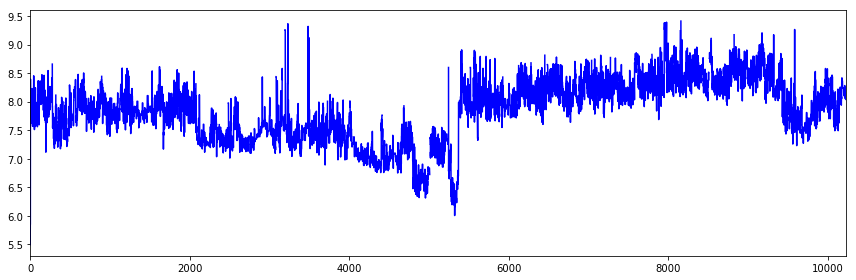

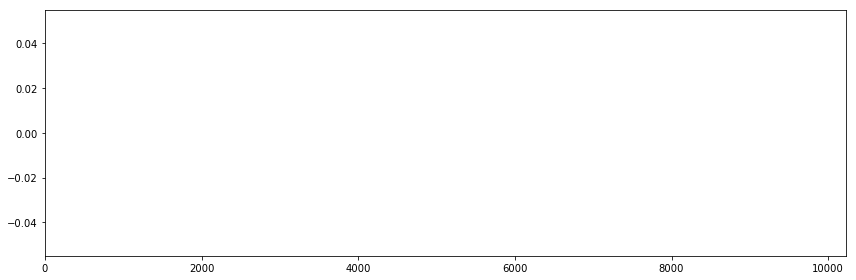

In [9]:
myplot(array)
array = np.log1p(array)
myplot(array)
array = (array-np.min(array,axis = 0,keepdims = True))\
        /(np.max(array,axis = 0,keepdims = True)-np.min(array,axis = 0,keepdims = True))
myplot(array)

(<matplotlib.figure.Figure at 0x7fc4ae9c0c90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc4ae869910>)

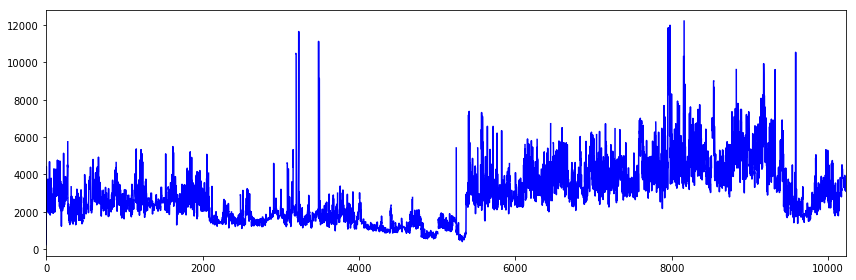

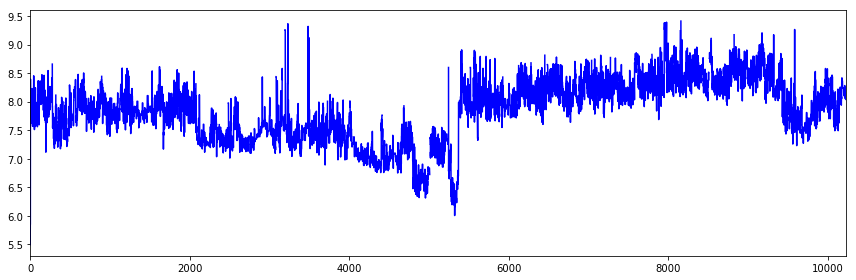

In [7]:

myplot(np.log1p(array))

(<matplotlib.figure.Figure at 0x7f0dcc0492d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0dcc0288d0>)

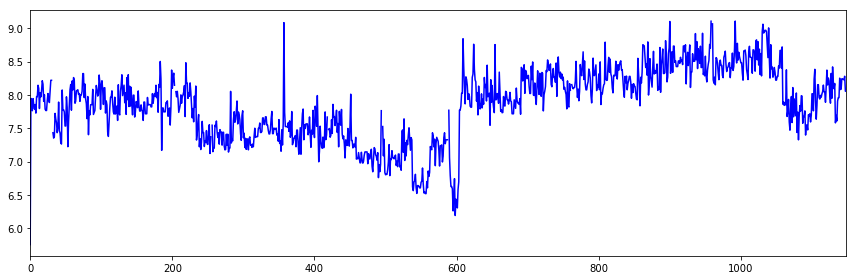

In [21]:
%run myplot.py
myplot(np.log1p(col))

(<matplotlib.figure.Figure at 0x7f0dcbfa3190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0dce99f610>)

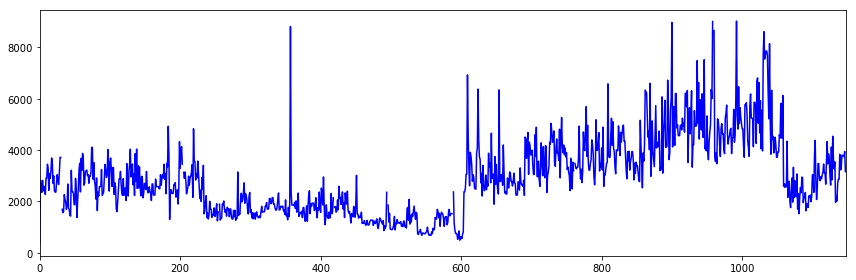

In [22]:
myplot(col)

In [7]:
X,y = ML_inputs.get_data()
print X.shape,y.shape
print y

Returning masked data
(1141, 197) (1141, 1)
[[ 0.08718792]
 [ 2.24763239]
 [ 2.63107337]
 ..., 
 [ 0.6697543 ]
 [ 2.47147161]
 [ 1.1975794 ]]


In [21]:
a = "mfpt_5"
a.find("gmfpt") > -1

False

In [33]:
%run ML_pipelines.py
clf = run_ML(ML_inputs,by_groups = "chrom")

Returning masked data
True
True

Running ML for 'chrom' = 'chrY'
Group data set has 3 samples

Running ML for 'chrom' = 'chrX'
Group data set has 273 samples

	Performing parameter grid search...
		Time taken:2.0472240448
	Best parameters: {'max_features': 20, 'min_samples_split': 100}
	Accuracy (mean +/- 2*sd): 0.53 (+/- 0.12)


NameError: global name 'y_pred' is not defined

In [146]:
features

{'CBP_GSE17954': 'distance from closest CBP_GSE17954 mark',
 'CDK12_GSE72023': 'distance from closest CDK12_GSE72023 mark',
 'CDK7_GSE50622': 'distance from closest CDK7_GSE50622 mark',
 'CDK7_GSE60027': 'distance from closest CDK7_GSE60027 mark',
 'CTCF_GSE12889': 'distance from closest CTCF_GSE12889 mark',
 'CTCF_GSE68976': 'distance from closest CTCF_GSE68976 mark',
 'DNA': 'DNA read count',
 'ERG_GSE49091': 'distance from closest ERG_GSE49091 mark',
 'ETS1_GSE17954': 'distance from closest ETS1_GSE17954 mark',
 'GABPA_GSE49091': 'distance from closest GABPA_GSE49091 mark',
 'GATA3_GSE29181': 'distance from closest GATA3_GSE29181 mark',
 'GATA3_GSE68976': 'distance from closest GATA3_GSE68976 mark',
 'GATA3_GSE76181': 'distance from closest GATA3_GSE76181 mark',
 'H2AX_GSE25577': 'distance from closest H2AX_GSE25577 mark',
 'H3K27ac': 'distance from closest H3K27ac mark',
 'H3K27ac_GSE50622': 'distance from closest H3K27ac_GSE50622 mark',
 'H3K27ac_GSE51522': 'distance from closest 

In [5]:
print features['H3K9me3_GSE65687']
print features['mapq']

distance from closest H3K9me3_GSE65687 mark
barcode-locus assignment score


Reading the train dataset and extracting the feature names

In [21]:
df = pd.read_table("Jurkat_hiv_50kb.txt",comment="#")
#df = pd.read_table("train-Jurkat_BHIVE_mini_expr.txt")
#df = pd.read_table("/mnt/shared/data/MachineLearning/Jurkat_hiv_train_50kb.txt",comment="#")
print df.shape
column_names = df.columns.tolist()
df.head()

(11378, 315)


,brcd,chrom,pos,strand,nread,mapq,cat,gene_name,d_actgen,d_acttss,...,TCF12_GSE29181_hb,TCF12_GSE29181_hb_r,TCF3_GSE29181_zb,TCF3_GSE29181_zb_r,TCF3_GSE29181_hb,TCF3_GSE29181_hb_r,UTX_GSE72300_zb,UTX_GSE72300_zb_r,UTX_GSE72300_hb,UTX_GSE72300_hb_r
0,ACATATGATTAGGATT,chr1,721406,-,2539,26,IN,NaN,158177,173282,...,13,0.030374,3,0.007009,1,0.002336,617,1.441589,188,0.439252
1,CAGGGGATGGCTCGGATGGG,chr1,752311,+,121,13,IN,NaN,127272,142377,...,57,0.046042,4,0.003231,2,0.001616,1554,1.255250,509,0.411147
2,ATTCGCGGTCTTGTTTG,chr1,761612,+,1988,22,IN,NaN,117971,133076,...,57,0.046042,4,0.003231,2,0.001616,1554,1.255250,509,0.411147
3,GATGATATTAGTGACTTAAG,chr1,765174,-,56,13,EN,NaN,114409,129514,...,57,0.046042,4,0.003231,2,0.001616,1554,1.255250,509,0.411147
4,AGGAAGGATGACGTAATGTT,chr1,778623,-,584,22,EN,NaN,100960,116065,...,57,0.046042,4,0.003231,2,0.001616,1554,1.255250,509,0.411147


### Looking at integration count for each chromosome

In [3]:
#chr_expr = df.groupby("chrom")["expr"]#.agg(["count","mean","std","median","min","max"])
#print chr_expr.agg(["count","mean","std","median","min","max"])
#df.boxplot(column="expr",by = "chrom",figsize=(15,10))

In [4]:
#chr_count = chr_expr.count().sort_values()
#plt.figure(figsize=(15,10))
#plt.xticks(range(len(chr_count.values)),chr_count.index.tolist())
#plt.plot(chr_count.values,"o")
#plt.show

In [5]:
#mapq_expr = df.groupby("H3K4me3")["expr"]#.agg(["count","mean","std","median","min","max"])
#print mapq_expr.agg(["count","mean","std","median","min","max"])
#df.boxplot(column="nread",by = "mapq",figsize=(15,10))
#df[df.H3K4me3 < 5000].plot("H3K4me3","expr",kind = "scatter")

Features with NaN values.
gene_name explained
other NaN because given mark does not exist in given chromosome. Substitute with plus infinity or remove this feature for samples that do not have it.

In [43]:
#nan_columns = df.isnull().any(axis = 0).index[df.isnull().any(axis = 0) == True].tolist()
#for feature in nan_columns:
#    print feature,":", features[feature],"\n",df[feature].max()

## Creating dummy one-hot variables

In [22]:
%run scripts/dataset_processing.py
cat_features = ["cat","strand"]
df = encode_one_hot(df,cat_features)
df.head()

There are 5 unique values for "cat" feature.

['AG' 'AP' 'EN' 'IN' 'SG']
There are 2 unique values for "strand" feature.

['+' '-']


,brcd,chrom,pos,nread,mapq,gene_name,d_actgen,d_acttss,d_silgen,d_siltss,...,TCF3_GSE29181_hb_r,UTX_GSE72300_zb,UTX_GSE72300_zb_r,UTX_GSE72300_hb,UTX_GSE72300_hb_r,cat_AP,cat_EN,cat_IN,cat_SG,strand_-
0,ACATATGATTAGGATT,chr1,721406,2539,26,NaN,158177,173282,17125,17730,...,0.002336,617,1.441589,188,0.439252,0,0,1,0,1
1,CAGGGGATGGCTCGGATGGG,chr1,752311,121,13,NaN,127272,142377,13173,13173,...,0.001616,1554,1.255250,509,0.411147,0,0,1,0,0
2,ATTCGCGGTCTTGTTTG,chr1,761612,1988,22,NaN,117971,133076,22474,22474,...,0.001616,1554,1.255250,509,0.411147,0,0,1,0,0
3,GATGATATTAGTGACTTAAG,chr1,765174,56,13,NaN,114409,129514,26036,26036,...,0.001616,1554,1.255250,509,0.411147,0,1,0,0,1
4,AGGAAGGATGACGTAATGTT,chr1,778623,584,22,NaN,100960,116065,39419,39419,...,0.001616,1554,1.255250,509,0.411147,0,1,0,0,1


## Adding GMFPT and Contact decay features

In [23]:
resolution = {'100kb': 100000, '10kb': 10000, '500kb': 50000, '50kb': 50000}

In [24]:
%run /home/etiavlovsky/CRG/scripts/dataset_processing.py
#%run scripts/file_processing.py

res = "50kb"
#bins = (df["pos"]/resolution[res]).astype(np.int).values
directory = "/mnt/shared/data/HiC_processing/"
feature_filenames = {"c_decay":"contacts_decay_Jurkat_",\
                     "gmfpt":"gmfpt_feature_Jurkat_",\
                     "row_sum":"row_sum_Jurkat_"}

df = import_features(df,res,directory,feature_filenames)
column_names = df.columns.tolist()

Computing feature: row_sum
Computing feature: gmfpt
Computing feature: c_decay


In [25]:
# split into train and test datasets
%run ~/CRG/scripts/table_processing.py
train_idx,test_idx = train_test_split(df,0.8)

In [26]:
df.shape

(11378, 321)

In [36]:
# select training set
df_train = df.ix[train_idx,:]
print df_train.shape
df_train.to_csv("Jurkat_hiv_train_50kb.txt",sep="\t",index=False)
del df_train

(9092, 321)


In [42]:
df_train = pd.read_csv("Jurkat_hiv_test_50kb.txt",sep="\t",)
df_train.shape

(2286, 319)

In [43]:
del df_train

In [41]:
# select training set
df_test = df.ix[test_idx,:]
drop_features(df_test,["RNA","expr"])
print df_test.shape
print df_test.head()
df_test.to_csv("Jurkat_hiv_test_50kb.txt",sep="\t",index=False)
del df_test

      RNA      expr
17    917  0.140478
20   4444  0.100316
21   1524  0.051242
22   3858  0.184996
23  15555  0.394319
(2286, 319)
                    brcd chrom      pos  nread  mapq gene_name  d_actgen  \
17   CGCAGCCGACGTACCGACG  chr1  1278044    141   100      DVL1         0   
20  TTGATTCTACCTCAGGGAGA  chr1  1327159   3930    28     CCNL2         0   
21  GCCTCACACATTTGAGACCC  chr1  1329333    638    25     CCNL2         0   
22  GGATGGACTTCGGATCTTAA  chr1  1452503    216   100    ATAD3A         0   
23      CTCCCTCGTTGGCGGC  chr1  1455991     21    13    ATAD3A         0   

    d_acttss  d_silgen  d_siltss   ...     UTX_GSE72300_hb  UTX_GSE72300_hb_r  \
17      6685      7357     11349   ...                 465           0.445402   
20      7548     26640     29989   ...                 534           0.442786   
21      5374     24466     27815   ...                 534           0.442786   
22      4971     18050     23329   ...                 507           0.440104   
23    

In [8]:
%run scripts/dataset_processing.py
y = get_target_values(df)
df.head()

NameError: name 'df' is not defined

In [9]:
y_train = encode_target_values(df_train)
print y_train
df_train.head()

Label split: 0.51
(9902,)
[ 1.  0.  1. ...,  0.  1.  1.]


,brcd,chrom,pos,strand,nread,mapq,cat,gene_name,d_actgen,d_acttss,...,RNA,expr,AG,AP,EN,SG,Stand +,in_gene,RNA/DNA,pos_expr
0,AAACACGGCCTTGCCTTTT,chr11,66913386,-,1172,31,AG,KDM2A,0,26645,...,981,0.382298,1.0,0.0,0.0,0.0,0.0,1.0,7.160584,1.0
1,AAACAGCTAAATTCCGG,chr6,97617243,+,1737,19,AG,MMS22L,0,113849,...,785,-0.548592,1.0,0.0,0.0,0.0,1.0,1.0,0.839572,0.0
2,AAACGAGCGGCTCAATAAGG,chr22,40268421,+,4112,31,SG,ENTHD1,28664,28664,...,49790,0.392111,0.0,0.0,0.0,1.0,1.0,1.0,7.324213,1.0
3,AAACTACATCTAGTAGTCTA,chr1,229585998,+,1170,26,AG,NUP133,0,16152,...,9506,-0.034481,1.0,0.0,0.0,0.0,1.0,1.0,2.742643,0.0
4,AAACTGACTGATTGAATGCC,chr17,36374093,-,14902,28,AG,RP11-1407O15.2,0,15926,...,19513,0.125444,1.0,0.0,0.0,0.0,0.0,1.0,3.963640,1.0


In [67]:
y_test = encode_target_values(df_test)
print y_test
df_test.head()

Label split: 0.51
(2979,)
[ 0.  1.  0. ...,  0.  1.  0.]


,brcd,chrom,pos,strand,nread,mapq,cat,gene_name,d_actgen,d_acttss,...,DNA,RNA,AG,AP,EN,SG,Stand +,in_gene,RNA/DNA,pos_expr
0,AAAAGAGCCCATCCGG,chr2,231199652,+,763,100,AG,SP140L,0,7752,...,1439,90,1.0,0.0,0.0,0.0,1.0,1.0,0.062543,0.0
1,AAAATAGCAGTTCCCTAGTA,chr1,230393530,+,1780,29,EN,GALNT2,0,167944,...,3348,17864,0.0,0.0,1.0,0.0,1.0,1.0,5.335723,1.0
2,AAACAGAATTATTAATCGTC,chrX,44172515,-,7157,34,SG,EFHC2,210369,229731,...,1113,230,0.0,0.0,0.0,1.0,0.0,1.0,0.206649,0.0
3,AAACATACATTTGTCCCGCA,chr17,37441592,-,15035,31,AG,FBXL20,0,85055,...,7021,36754,1.0,0.0,0.0,0.0,0.0,1.0,5.234867,1.0
4,AAAGAGTCATATAAGTAAAC,chr3,31430371,+,2537,24,EN,NaN,143758,143758,...,152,2039,0.0,0.0,1.0,0.0,1.0,0.0,13.414474,1.0


Dropping the Categorical and non_numerical features

In [155]:
chroms = df.chrom.values
chroms

array(['chr2', 'chr2', 'chr2', ..., 'chrY', 'chrY', 'chrY'], dtype=object)

In [157]:
%run scripts/table_processing.py
drop_features(df)
df.head()

                     brcd chrom gene_name  rep    RNA/DNA  pos_expr    RNA  \
0        AAAAGAGCCCATCCGG  chr2    SP140L    3   0.062543       0.0     90   
15   AAATATGGTCCAGACTTAAG  chr2     WDR33    1  11.591281       1.0   4254   
35   AACCACATTCTCCTGACTCG  chr2  SLC39A10    1   4.359519       1.0  18868   
80    AAGCGGTCGTGTTGGGTTT  chr2       C1D    8   2.961783       0.0   1395   
130      AATCCAAATTGGCGCA  chr2       NaN    6   1.271832       0.0   1937   

         expr  nread  mapq   DNA  
0   -1.682349    757    29  1439  
15   0.585601    738    20   367  
35   0.160908   9568    11  4328  
80  -0.006977   2566    26   471  
130 -0.374101   5529    30  1523  


In [159]:
%run scripts/table_processing.py
X,feature_names = create_matrix(df)
del df

Max value in the data nan


### Applying the Decision tree classifier

In [79]:
clf = DecisionTreeClassifier()
clf.get_params
parameters = {"min_samples_split":(2,10,100,150)}
clf = GridSearchCV(clf, parameters,cv = 10)
clf.fit(X_train,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': (2, 10, 100, 150)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [80]:
print clf.best_params_,clf.best_score_
cv_results = pd.DataFrame(clf.cv_results_)
cv_results[['params',"mean_test_score","std_test_score"]]

{'min_samples_split': 150} 0.528176126035


,params,mean_test_score,std_test_score
0,{u'min_samples_split': 2},0.519996,0.016515
1,{u'min_samples_split': 10},0.516562,0.019125
2,{u'min_samples_split': 100},0.523329,0.018952
3,{u'min_samples_split': 150},0.528176,0.016548


In [81]:
from sklearn.model_selection import cross_val_score
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
clf = DecisionTreeClassifier(min_samples_split=150)
scores = cross_val_score(clf, X, y, cv=cv)
print scores       

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.54490414  0.5469223   0.51160444  0.52674067  0.49949546  0.52169526
  0.52774975  0.50050454  0.53279516  0.51261352]
Accuracy: 0.52 (+/- 0.03)


In [31]:
kf = KFold(n_splits = 10,shuffle = True)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
yhat = np.zeros((X.shape[0],1))

acc = np.zeros((10,))

count = 0
for train_idx, test_idx in cv.split(X,y):
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    clf = DecisionTreeClassifier(min_samples_split = 100)
    
    yhat_train = clf.fit(X_train,y_train).predict(X_train)
    yhat[test_idx] = clf.predict(X_test).reshape(-1,1)   
    
    acc[count] = metrics.accuracy_score(y_test,yhat[test_idx])
    #print '\nTraining Accuracy score: ' + str(metrics.accuracy_score(y_train,yhat_train))
    #print 'Testing Accuracy score: ' + str(metrics.accuracy_score(y_test,yhat[test_idx]))

#print '\nAccuracy score: ',acc.mean()
#print metrics.classification_report(y,yhat)

### Applying RandomForestClassifer

In [160]:
chroms = chroms.astype(np.str)

In [161]:
chroms

array(['chr2', 'chr2', 'chr2', ..., 'chrY', 'chrY', 'chrY'], 
      dtype='|S5')

In [169]:
%run scripts/ML_pipelines.py
for chrom_name in np.unique(chroms):
    chrom = np.where(chroms == chrom_name)[0]
    X_chrom = X[chrom,:]
    y_chrom = y[chrom]
    print "\n",chrom_name,chrom.shape,"%.2f"%y_chrom.mean()
    try:
        SVM_pipeline(X_chrom,y_chrom)
    except:
        continue
del X_chrom,y_chrom


chr1 (816,) 0.51

Best parameters: {'max_features': 20, 'min_samples_split': 2}
Accuracy (mean +/- 2*sd): 0.53 (+/- 0.05)

chr10 (282,) 0.46

Best parameters: {'max_features': 'auto', 'min_samples_split': 10}
Accuracy (mean +/- 2*sd): 0.51 (+/- 0.16)

chr11 (567,) 0.59

Best parameters: {'max_features': 5, 'min_samples_split': 2}
Accuracy (mean +/- 2*sd): 0.60 (+/- 0.06)

chr12 (561,) 0.53

Best parameters: {'max_features': 'auto', 'min_samples_split': 100}
Accuracy (mean +/- 2*sd): 0.55 (+/- 0.09)

chr13 (191,) 0.53

Best parameters: {'max_features': 'auto', 'min_samples_split': 100}
Accuracy (mean +/- 2*sd): 0.52 (+/- 0.22)

chr14 (273,) 0.50

Best parameters: {'max_features': 5, 'min_samples_split': 2}
Accuracy (mean +/- 2*sd): 0.54 (+/- 0.15)

chr15 (206,) 0.49

Best parameters: {'max_features': 5, 'min_samples_split': 10}
Accuracy (mean +/- 2*sd): 0.52 (+/- 0.21)

chr16 (510,) 0.53

Best parameters: {'max_features': 'auto', 'min_samples_split': 50}
Accuracy (mean +/- 2*sd): 0.55 

In [40]:
%run scripts/ML_pipelines.py
del clf
clf = RF_pipeline(X[:500],y[:500])


Best parameters: {'max_features': 'auto', 'min_samples_split': 100}
Best parameters score: 0.618

Ten-fold cross-validation scores using best parameters:
[ 0.58  0.7   0.56  0.54  0.66  0.58  0.54  0.6   0.66  0.58]
Accuracy: 0.60 (+/- 0.10)


In [175]:
#Train the classifer on the full training set
clf = RandomForestClassifier(n_estimators=30,min_samples_split=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [176]:
#Test the classifier on full test set
hRF = clf.predict(X_test)
print "Accuracy of classifier is %.2f" %clf.score(X_test,y_test)

Accuracy of classifier is 0.56


### Applying AdaBoostClassifier

In [69]:
abc = AdaBoostClassifier()
abc.get_params()
parameters = {'n_estimators':(50, 100)}
clf = GridSearchCV(abc, parameters,cv = 10)
clf.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (50, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [87]:
#print clf.best_params_,clf.best_score_
#pd.DataFrame(clf.cv_results_)

In [86]:
cv = StratifiedKFold(n_splits=10)
clf = AdaBoostClassifier()
scores = cross_val_score(clf, X, y, cv=cv)
print scores       

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.56306761  0.55600404  0.53985873  0.55196771  0.55959596  0.55757576
  0.59393939  0.53434343  0.58543984  0.54499494]
Accuracy: 0.56 (+/- 0.04)


In [83]:
#All ones assignemnt
yhat = np.ones_like(y)
print "All ones assignment"
print '\nAccuracy score: %.2f'%metrics.accuracy_score(y,yhat)

All ones assignment

Accuracy score: 0.51


### Extracting top feature from best classifier and prediction only using those

In [126]:
order = clf.feature_importances_.argsort().tolist()[::-1]
for number in order[:10]:
    print number,feature_names[number],clf.feature_importances_[number]

n_top = 10
top_features = [feature_names[x] for x in order[:n_top]]
top_features_idx = [x for x in order[:n_top]]

print top_features
print top_features_idx

43 H3K9me3_GSE65687 0.027771517302
19 H3K27ac 0.0272310831315
2 d_acttss 0.0254593541458
5 d_actprom 0.0235609978868
40 H3K79me3 0.023171059979
42 H3K9me3 0.022423445635
33 H3K4me3 0.0218675584392
27 H3K27me3_GSE59257 0.0215322926875
48 NRSF_GSE53366 0.0210438668155
28 H3K27me3_GSE72300 0.0194435653184
['H3K9me3_GSE65687', 'H3K27ac', 'd_acttss', 'd_actprom', 'H3K79me3', 'H3K9me3', 'H3K4me3', 'H3K27me3_GSE59257', 'NRSF_GSE53366', 'H3K27me3_GSE72300']
[43, 19, 2, 5, 40, 42, 33, 27, 48, 28]


In [151]:
# Create the data matrices with only top features
X_train_top = X_train[:,top_features_idx]
X_test_top = X_test[:,top_features_idx]

In [145]:
# cross validate the classifier using the best parameters
cv = StratifiedKFold(n_splits=10)
clf = RandomForestClassifier(n_estimators=30,min_samples_split=100)
scores = cross_val_score(clf, X_train_top, y_train, cv=cv)

In [146]:
# print the score of cross-validation
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.55600404  0.56710394  0.54086781  0.53380424  0.54949495  0.54949495
  0.58383838  0.56868687  0.57330637  0.55915066]
Accuracy: 0.56 (+/- 0.03)


In [147]:
#Train the classifer on the full training set
clf = RandomForestClassifier(n_estimators=30,min_samples_split=100,oob_score=True)
clf.fit(X_train_top,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [148]:
#Test the classifier on full test set
print "Accuracy of classifier is %.2f" %clf.score(X_test_top,y_test)

Accuracy of classifier is 0.55


In [149]:
order = clf.feature_importances_.argsort().tolist()[::-1]
for number in order:
    print number,top_features[number],clf.feature_importances_[number]

4 H3K79me3 0.116644020047
5 H3K9me3 0.112269243791
9 H3K27me3_GSE72300 0.103792329953
6 H3K4me3 0.101230128898
8 NRSF_GSE53366 0.100833701343
0 H3K9me3_GSE65687 0.0974056983605
2 d_acttss 0.0963285343368
1 H3K27ac 0.0933202290408
7 H3K27me3_GSE59257 0.0926392624873
3 d_actprom 0.0855368517435


In [152]:
del X_train_top,X_test_top

### Creating the matrices with log values

In [14]:
X_train_log = np.c_[np.log10(X_train[:,:70]+1),X_train[:,70:]]
X_test_log = np.c_[np.log10(X_test[:,:70]+1),X_test[:,70:]]

NameError: name 'X_test' is not defined

### Kernel PCA

In [39]:
#X_train_log = minmax_scale(X_train_log)
t1 = time()
kpca = KernelPCA(3,kernel="rbf", gamma=.1,n_jobs=-1)
X_kpca = kpca.fit_transform(X_train_log)
print "Time taken: %.3f"%(time()-t1)

Time taken: 10.604


In [40]:
kpca.lambdas_

array([ 704.73369209,  550.56345516,  300.27094407])

In [35]:
reds = y_train == 0
blues = y_train == 1

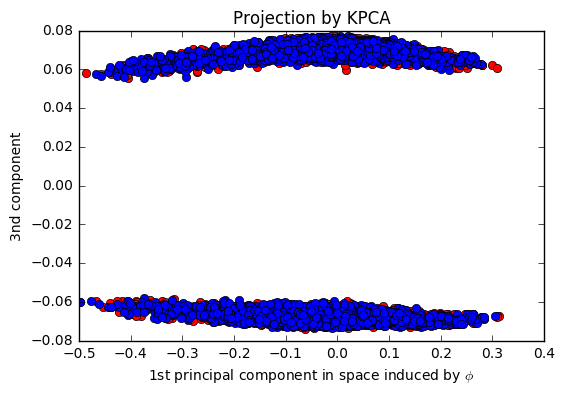

In [37]:
pcx = 0
pcy = 2
plt.plot(X_kpca[reds, pcx], X_kpca[reds, pcy], "ro")
plt.plot(X_kpca[blues, pcx], X_kpca[blues, pcy], "bo")
plt.title("Projection by KPCA")
plt.xlabel("%dst principal component in space induced by $\phi$"%(pcx+1))
plt.ylabel("%dnd component"%(pcy+1))

### Applying logistic classification log values of features

Below is the distribution

In [153]:
#df.hist("POL2_GSE65687",bins = 100,figsize = (10,10))
#some_feature = X[:,54]
#plt.figure(figsize = (10,10))
#plt.hist(some_feature+1,bins = 100)
#plt.hist(np.log10(some_feature+1),bins = 100)
#plt.show

In [77]:
np.log10(1e9)

9.0

In [33]:
threshold = 5000
print np.where(X[:,:70] > threshold,0.,1.).sum()/(X[:,:70].shape[0]*X[:,:70].shape[1])
X_binary = np.c_[np.where(X[:,:70] > threshold,0.,1.),X[:,70:]]
X_binary[0,:]

0.218564792105


array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.])

### Applying SVM

In [157]:
# timing the SVM
t1 = time()
clf = make_pipeline(MinMaxScaler(), svm.SVC(C = 1,gamma=0.1))
clf.fit(X_train_log,y_train)
print "Training SVM took %.2f s." %(time()-t1)

Training SVM took 14.32 s.


In [162]:
print X_train_log.shape
clf.score(X_train_log,y_train)

(9902, 76)


0.59099171884467783

In [164]:
print X_test_log.shape
clf.score(X_test_log,y_test)

(2979, 76)


0.5501846257133266

In [ ]:
# perform the grid search to find the best parameters
clf = make_pipeline(MinMaxScaler(), svm.SVC())
print clf.get_params().keys()
parameters = {"svc__C":[1],"svc__gamma":[0.1,.2,.5]}
clf = GridSearchCV(clf, parameters,cv = 5)
clf.fit(X_train_log,y_train)

In [ ]:
# print the result of grid search
print clf.best_params_,clf.best_score_
cv_results = pd.DataFrame(clf.cv_results_)
cv_results
cv_results[['params',"mean_test_score","std_test_score",'rank_test_score']].sort_values(by="rank_test_score")

In [181]:
# cross validate the classifier using the best parameters
t1 = time()
cv = StratifiedKFold(n_splits=5)
clf = make_pipeline(MinMaxScaler(), svm.SVC(C = 1,gamma=0.1))
scores = cross_val_score(clf, X_train_log, y_train, cv=cv,n_jobs=-1)
print time()-t1

33.0519340038


In [180]:
# print the results of cross-validation
print scores       
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.55830389  0.5572943   0.55376073  0.58585859  0.57655382]
Accuracy: 0.57 (+/- 0.03)


In [168]:
#Train the classifer on the full training set
clf = make_pipeline(MinMaxScaler(), svm.SVC(C = 1,gamma=0.1))
clf.fit(X_train_log,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [170]:
#Test the classifier on full test set
hSVM = clf.predict(X_test_log)
print "Accuracy of classifier is %.2f" %clf.score(X_test_log,y_test)

Accuracy of classifier is 0.55


In [173]:
metrics.accuracy_score(hRF,hSVM)

0.78147029204431018